In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/dataset-netflix-shows/netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Filling missing values

In [5]:
df["director"] = df["director"].fillna( "Unknown")
df["cast"] = df["cast"].fillna( "Unknown")
df["country"] = df["country"].fillna( "Unknown")
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('UR')

### 1. How many unique movies and TV shows are in the dataset?

In [6]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [7]:
unique_movies = df[df['type']=='Movie']

In [8]:
lst = unique_movies['title'].unique()

In [9]:
unique_movies['title'].count()

6131

In [10]:
pd.DataFrame(lst).count()

0    6131
dtype: int64

In [11]:
Unique_TV_Show = df[df['type']=='TV Show']
lst = Unique_TV_Show['title'].unique()

In [12]:
Unique_TV_Show['title'].count()

2676

In [13]:
pd.DataFrame(lst).count()

0    2676
dtype: int64

### 2. Count the number of movies and TV shows separately.

In [14]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

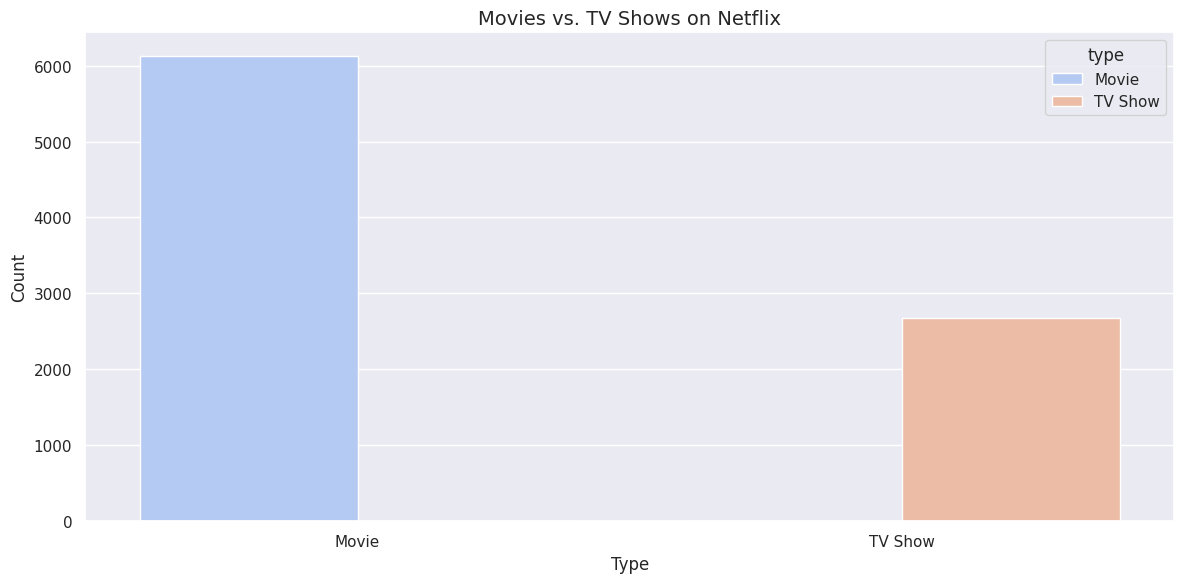

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='type',hue="type", data=df, palette="coolwarm")
plt.title('Movies vs. TV Shows on Netflix', fontsize=14)
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 3. What is the earliest and latest release year in the dataset?

In [16]:
release_years = df['release_year'].sort_values(ascending=False).unique()

In [17]:
release_years

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1956, 1955,
       1954, 1947, 1946, 1945, 1944, 1943, 1942, 1925])

In [18]:
# Latest release year
release_years[0]

2021

In [19]:
# Earliest release year
arr_len = len(release_years)
release_years[arr_len - 1]

1925

### 4. List the unique genres/categories in the dataset.

In [20]:
unique_genres = df['listed_in'].str.split(', ').explode().unique()

In [21]:
unique_genres

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [22]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
top_genres

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

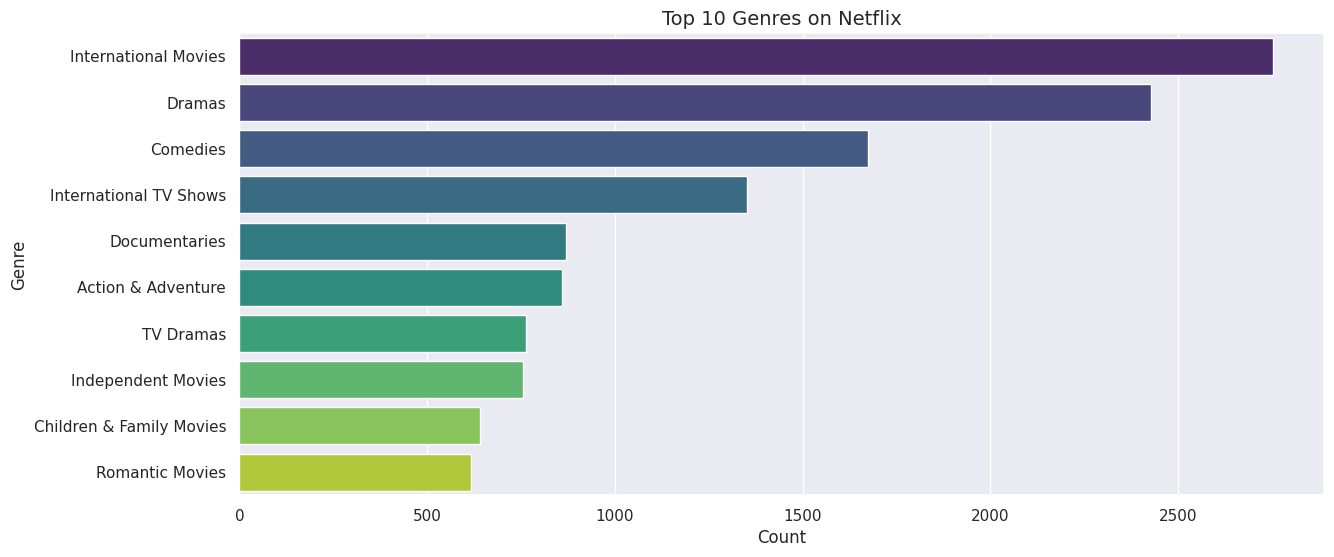

In [23]:
plt.figure(figsize=(14,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Top 10 Genres on Netflix', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

### 5. Which country has produced the most movies in the dataset?

In [24]:
# unique_movies df was created in the 1st question
result = unique_movies.groupby('country').size().sort_values(ascending=False).reset_index(name='movie_count')
result

,country,movie_count
0,United States,2058
1,India,893
2,Unknown,440
3,United Kingdom,206
4,Canada,122
...,...,...
647,"India, Mexico",1
648,"India, Malaysia",1
649,"India, Japan",1
650,"India, Iran",1


### 6. Visualize the number of movies and TV shows released each year. What trends do you observe?

In [25]:
# Filter for release years after 2000
filtered_df = df[df['release_year'] > 2000]
release_counts = filtered_df.groupby(['release_year', 'type']).size().unstack()

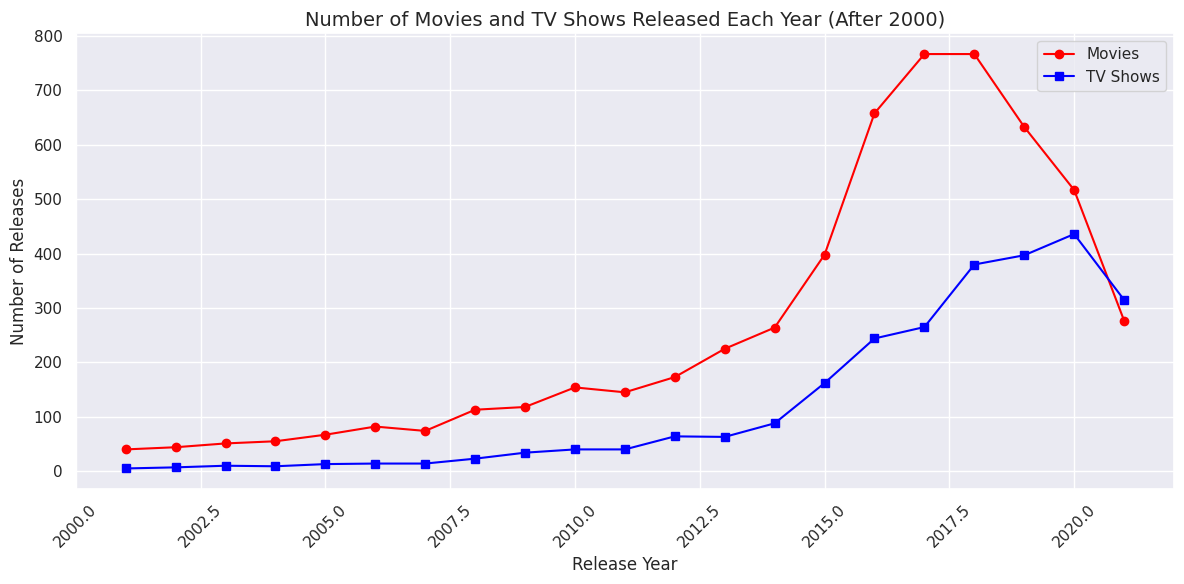

In [26]:
plt.figure(figsize=(12, 6))

# Plot movies with a red line
plt.plot(release_counts.index, release_counts['Movie'], label='Movies', color='red', marker='o')

# Plot TV shows with a blue line
plt.plot(release_counts.index, release_counts['TV Show'], label='TV Shows', color='blue', marker='s')

plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.title('Number of Movies and TV Shows Released Each Year (After 2000)', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7. Analyze the distribution of duration (in minutes) for movies and episodes. What insights can you gather?

In [27]:
def extract_duration(duration):
    if isinstance(duration, float) and np.isnan(duration):
        return np.nan
    else:
        return int(duration.split(' ')[0])

df['duration'] = df['duration'].apply(extract_duration)

In [28]:
# Separate movies and TV shows
movies_duration = df[df['type'] == 'Movie']['duration']
tv_duration = df[df['type'] == 'TV Show']['duration']

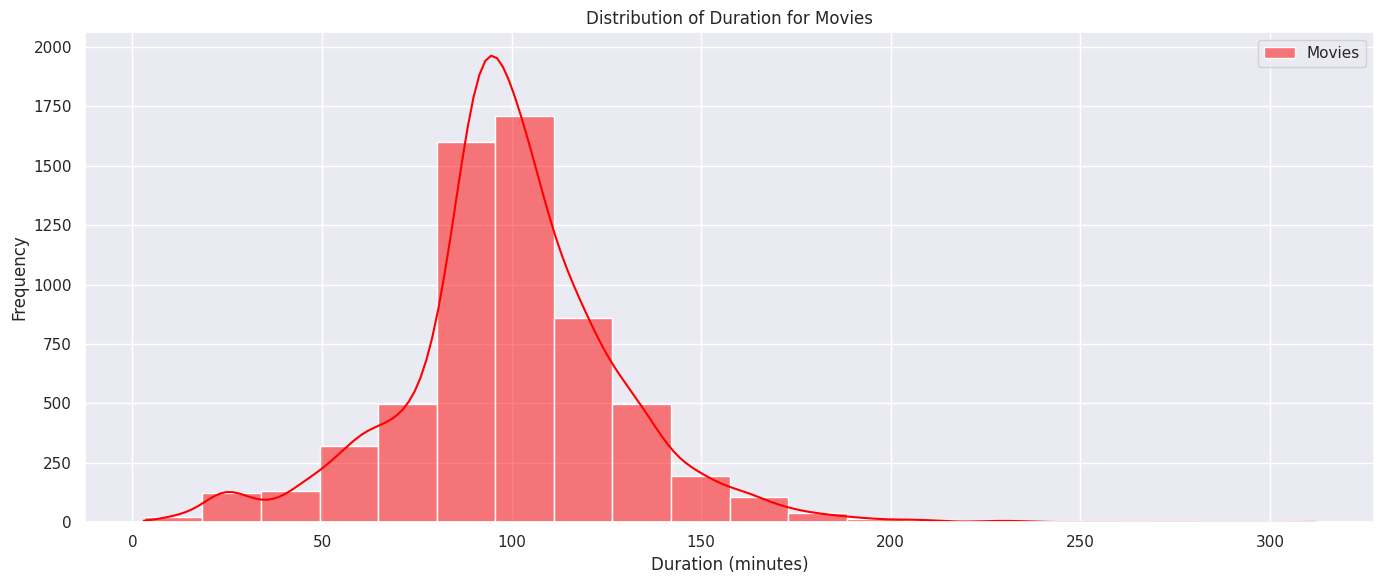

In [29]:
plt.figure(figsize=(14, 6))
# Movies distribution
sns.histplot(movies_duration, bins=20, color='red', kde=True, label='Movies')

plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration for Movies')
plt.legend()
plt.tight_layout()
plt.show()

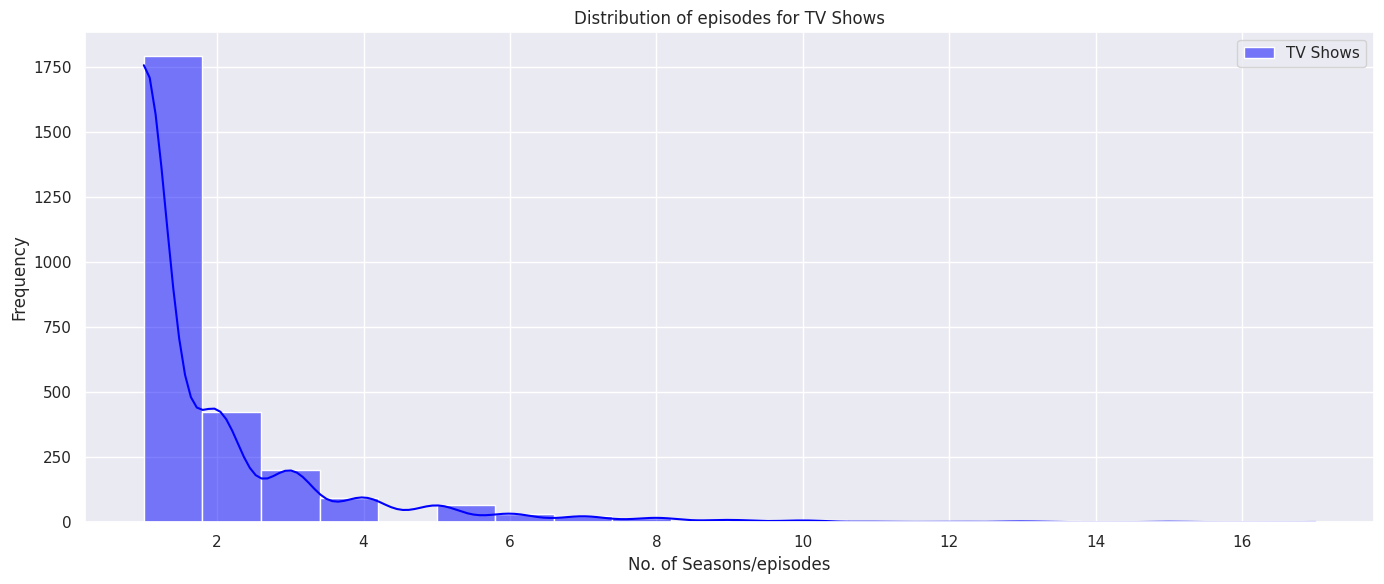

In [30]:
# TV episodes distribution
plt.figure(figsize=(14, 6))
sns.histplot(tv_duration, bins=20, color='blue', kde=True, label='TV Shows')

plt.xlabel('No. of Seasons/episodes')
plt.ylabel('Frequency')
plt.title('Distribution of episodes for TV Shows')
plt.legend()
plt.tight_layout()

plt.show()

### 8. Identify the top 5 directors who have directed the most content.

In [31]:
df["director"] = df["director"].fillna( "Unknown")

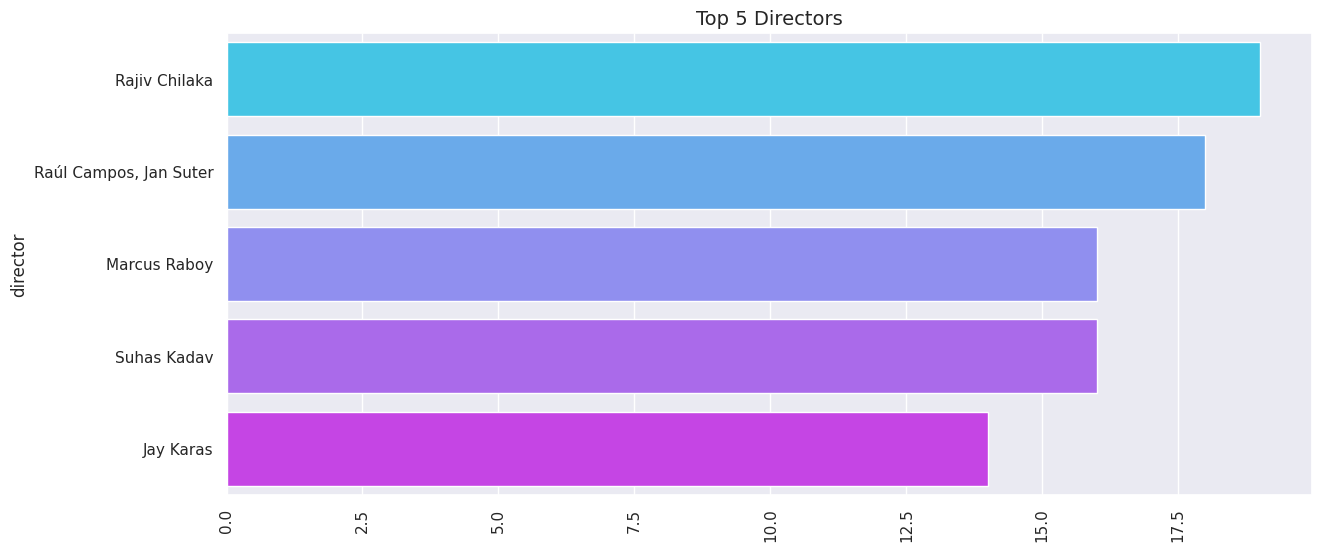

In [32]:
# Top 10 directors
plt.figure(figsize=(14, 6))
top_10_directors = df[df['director'] != "Unknown"]['director'].value_counts().head(5)
sns.barplot( x=top_10_directors.values, y=top_10_directors.index, palette='cool')
plt.title('Top 5 Directors', fontsize=14)
plt.xticks(rotation=90)
plt.show()

### 9. Which genres have become more or less common over the years? Provide a visualization to support your findings.

In [36]:
# Split genres into individual rows
filtered_df = df[df['release_year'] > 2000]
df['genres_split'] = filtered_df['listed_in'].str.split(', ')
genres_exploded = filtered_df.explode('genres_split')

# Group by release_year and genre, then count occurrences
genre_trends = genres_exploded.groupby(['release_year', 'genres_split']).size().unstack().fillna(0)

<Figure size 1600x800 with 0 Axes>

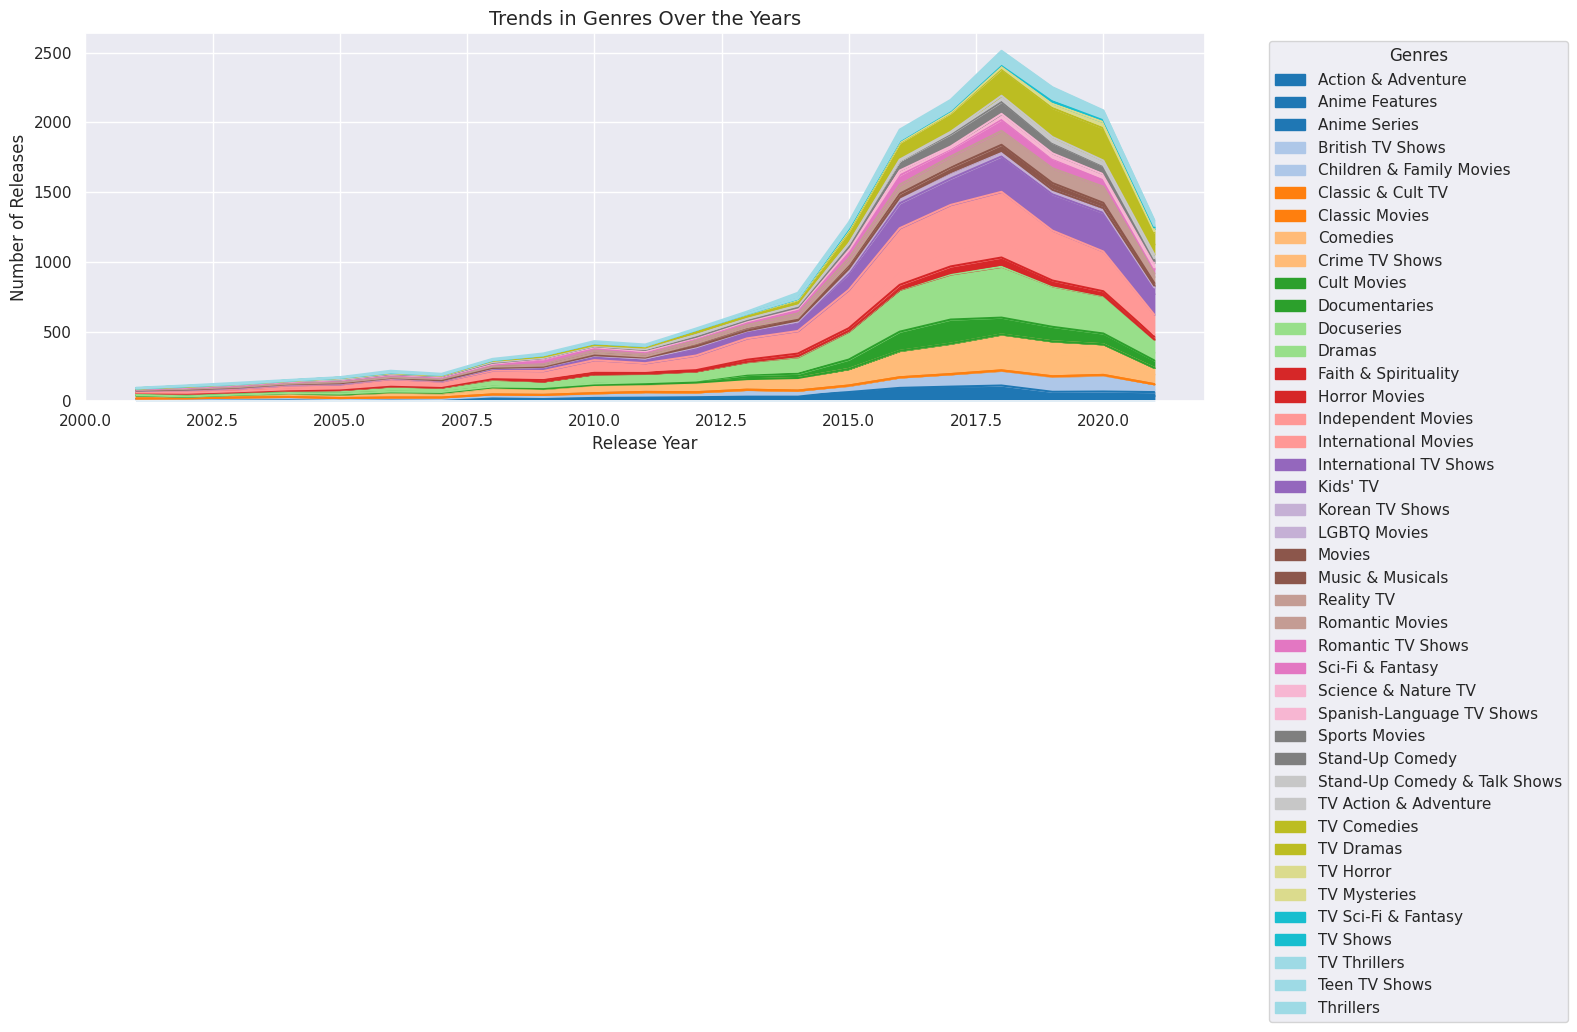

In [37]:
# Plot stacked area chart
plt.figure(figsize=(16, 8))
genre_trends.plot(kind='area', stacked=True, figsize=(16, 8), cmap="tab20")

plt.title('Trends in Genres Over the Years', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 10. Explore the relationship between countries and their popular genres. Are certain genres dominated by specific countries?

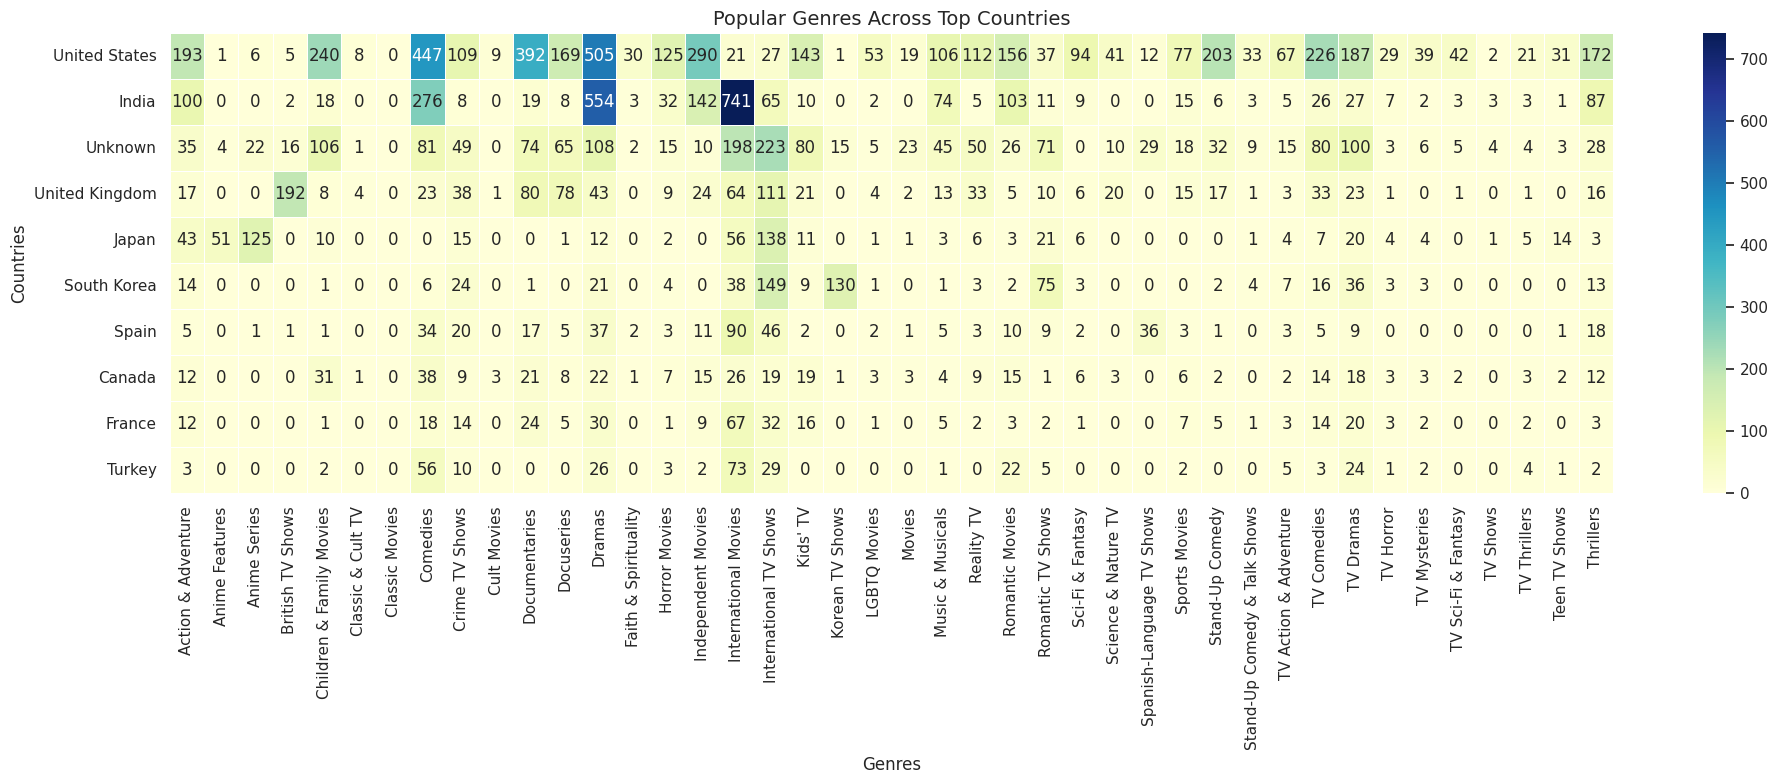

In [41]:
# Group by country and genre, then count occurrences
country_genre = genres_exploded.groupby(['country', 'genres_split']).size().unstack().fillna(0)

# Filter for countries with significant data
top_countries = country_genre.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_country_genre = country_genre.loc[top_countries]

# Heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(filtered_country_genre, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.7)

plt.title('Popular Genres Across Top Countries', fontsize=14)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.tight_layout()
plt.show()

### 11. Distribution of Ratings

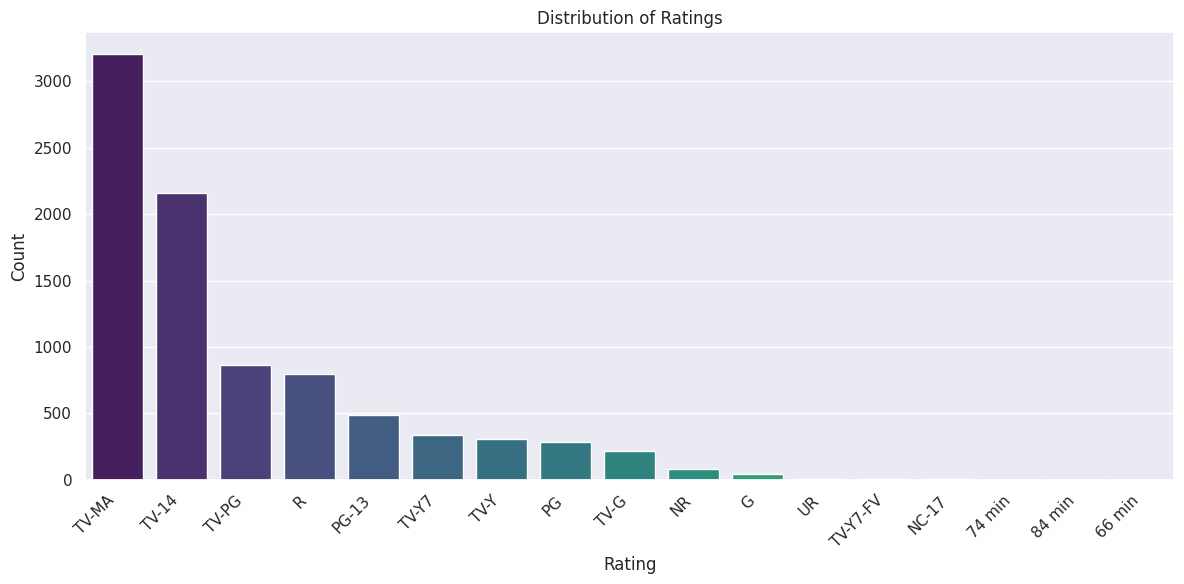

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()